# As eleições de Vice-Presidentes da Assembleia da República, 1975-2019

O momento político durante o qual estas palavras estão a ser escritas trouxe a questão das Vice-Presidências das Assembleia da República para a ordem do dia. Se até hoje estes cargos não despertavam grandes paixões - sendo a sua forma de eleição do aparente desconhecimento de boa parte da população - a reorganização parlamentar decorrente das eleições legislativas de 2021 tornou esta eleição um ponto de significativo interesse.


Quem foram os Vice-presidentes eleitos até hoje? Como foram eleitos? Existem diferenças ou tendências que se podem detectar? Estas são algumas das perguntas a que esta (bastante simples) análise pretende responder.

## Metodologia

Foram recolhidos os dados das eleições para Vice-Presidentes da Assembleia da República de todas as legislaturas, começando na Iª Legislatura em 1975. Os dados foram recolhidos de forma manual: não existindo fonte identificada que contivesse os dados em formato tabular, procedeu-se a um trabalho de recolha nas fontes originais, o que para este caso é o Diário da Assembleia da República.

Identificado, para cada legislatura, o número e página correspondente aos resultados das votações esses dados foram recolhidos e resultam na tabela que se segue; as únicas alterações foram para uniformização (por exemplo, o nome dos deputados pode ter variações consoante a legislatura).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from matplotlib.colors import ListedColormap
sns.set_theme(style="whitegrid", palette="pastel")
vpars = pd.read_csv('AR-VPARs.csv')

# Análise

Os dados são relativamente simples de analisar dada a quantidade de observações (55, no total). O total de candidatos a Vice-Presidentes é o seguinte, para todas as legislatura:

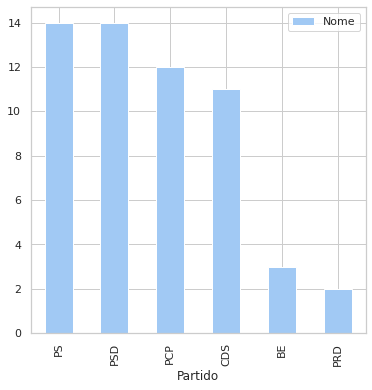

In [2]:
vpars.groupby('Partido')[['Nome']].count().sort_values("Nome", ascending=False).plot(kind="bar",stacked=True,figsize=(6,6))
plt.show()

Algumas datas relevantes:

* **1975**: Primeira eleição de Vice-presidentes, com representates do PS, PSD, CDS e PCP. 
* **1985**: Primeira alteração à composição com a entrada do PRD (e saída do CDS), mas também a primeira não-eleição de um Vice-Presidente (precisamente o indicado pelo PRD).
* **1991**: Retorno ao 4 partidos iniciais por saída do PRD.
* **2009**: PCP sem representação pela primeira vez, por entrada do BE.
* **2019**: CDS perde representação, PCP e BE com representação simultânea pela primeira vez.


Existiram, ao longo dos anos, mudanças na forma de se proceder à eleição: se até à VIIª legislatura as votações possíveis incluiam votos "Sim/Não/Abstençãp/Brancos/Nulos", a partir da VIIIª apenas se votam "Sim/Branco/Nulo", sendo que o criterio da necessidade de aprovação (logo, votos "Sim") pela maioria dos deputados se mantém.

Assumindo apenas a relação entre votos "Sim" e o total de votos (logo, não valorizando distinções entre votos contra, brancos ou nulos, algo que pode não obstante adicionar uma nova dimensão de análise), o seguinte diagrama mostra, em ordem ascendente, 

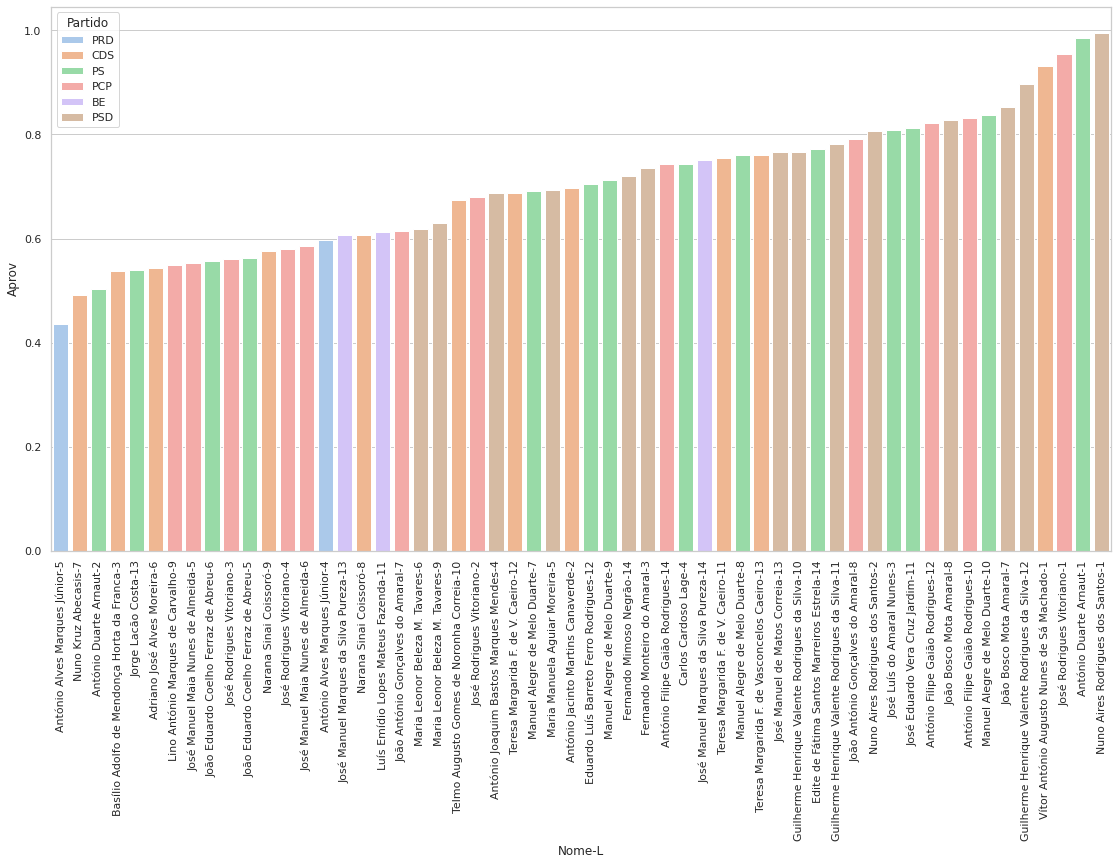

In [3]:
vpars["Aprov"]= vpars["Sim"]/vpars["Total"]
vpars["Nome-L"]= vpars["Nome"] + "-" + vpars["Legislatura"].astype(str)

vpars_sa = vpars.sort_values("Aprov",ascending=True)
sns.set(rc={'figure.figsize':(19,10)})
sns.set_theme(style="whitegrid", palette="pastel")

ax = sns.barplot(x="Nome-L", y="Aprov", hue="Partido", data=vpars_sa, order=vpars_sa["Nome-L"],ci=None, orient="v",dodge=False)
ax.tick_params(axis='x', rotation=90)


É interessante que as maiores perecntagens de aprovação são todas as referentes à Iª Legislatura. Os valores mais baixos parecem ser abaixo dos 50%; podemos seleccionar especificamente todos os que estejam abaixo desse valor:

In [4]:
vpars_sa[vpars_sa["Aprov"] < 0.5]

,Nome,Data,Legislatura,Partido,Sim,Não,Abstenções,Brancos,Nulos,Total,Ref,URL,Aprov,Nome-L
39,António Alves Marques Júnior,32014,5,PRD,102,75,47,10,0,234,"DAR, I Série, nº 3, V Legislatura, 1ª sessão l...",https://debates.parlamento.pt/catalogo/r3/dar/...,0.435897,António Alves Marques Júnior-5
30,Nuno Kruz Abecasis,35003,7,CDS,108,62,50,0,0,220,"DAR, I Série, nº 2, VII Legislatura, 1ª sessão...",https://app.parlamento.pt/webutils/docs/doc.pd...,0.490909,Nuno Kruz Abecasis-7


```{margin} Votações adicionais
Os dados recolhidos são relativos ao processo de votação original, não sendo impossível que existam votações separadas que alterem a situação. É de resto uma realidade, dado que o deputado do PRD referido é posteriormente sujeito a uma votação separada e e eleito para o cargo; não foi encontrada votação equivalente para Kruz Abecassis mas tal não significa que não tenha existido.
```

Quer isto dizer que não foram eleitos? De facto, foi precisamente isso que ocorreu: no Diário da Assembleia da República referente a 26 de Agosto de 1987 consta a acta da votação do dia anterior com o seguinte teor: *"Por outro lado, o candidato ao lugar da Vice-Presidente da Mesa da Assembleia da República António Alves Marques Júnior [...] não recolheram votos suficientes para a sua eleição"*. De idêntica forma aa cta referente ao dia 31 de Outubro de 1995 refere que *"Os Srs Deputados Nuno Kruz Abecasis e Maria Helena P. Nogueira não obtiveram o número de votos necessário para serem eleitos."*



# Os dados

Os dados recolhidos foram os seguintes

In [5]:
vpars

,Nome,Data,Legislatura,Partido,Sim,Não,Abstenções,Brancos,Nulos,Total,Ref,URL,Aprov,Nome-L
0,Edite de Fátima Santos Marreiros Estrela,43763,14,PS,177,0,0,48,4,229,"DAR, I Série, nº 2, XIV Legislatura, 1ª sessão...",https://app.parlamento.pt/webutils/docs/doc.pd...,0.772926,Edite de Fátima Santos Marreiros Estrela-14
1,Fernando Mimoso Negrão,43763,14,PSD,165,0,0,60,4,229,"DAR, I Série, nº 2, XIV Legislatura, 1ª sessão...",https://app.parlamento.pt/webutils/docs/doc.pd...,0.720524,Fernando Mimoso Negrão-14
2,José Manuel Marques da Silva Pureza,43763,14,BE,172,0,0,53,4,229,"DAR, I Série, nº 2, XIV Legislatura, 1ª sessão...",https://app.parlamento.pt/webutils/docs/doc.pd...,0.751092,José Manuel Marques da Silva Pureza-14
3,António Filipe Gaião Rodrigues,43763,14,PCP,170,0,0,55,4,229,"DAR, I Série, nº 2, XIV Legislatura, 1ª sessão...",https://app.parlamento.pt/webutils/docs/doc.pd...,0.742358,António Filipe Gaião Rodrigues-14
4,José Manuel de Matos Correia,42305,13,PSD,173,0,0,52,1,226,"DAR, I Série, nº 2, XIII Legislatura, 1ª sessã...",https://app.parlamento.pt/webutils/docs/doc.pd...,0.765487,José Manuel de Matos Correia-13
5,Jorge Lacão Costa,42305,13,PS,122,0,0,103,1,226,"DAR, I Série, nº 2, XIII Legislatura, 1ª sessã...",https://app.parlamento.pt/webutils/docs/doc.pd...,0.539823,Jorge Lacão Costa-13
6,José Manuel Marques da Silva Pureza,42305,13,BE,137,0,0,88,1,226,"DAR, I Série, nº 2, XIII Legislatura, 1ª sessã...",https://app.parlamento.pt/webutils/docs/doc.pd...,0.606195,José Manuel Marques da Silva Pureza-13
7,Teresa Margarida F. de Vasconcelos Caeiro,42305,13,CDS,172,0,0,54,0,226,"DAR, I Série, nº 2, XIII Legislatura, 1ª sessã...",https://app.parlamento.pt/webutils/docs/doc.pd...,0.761062,Teresa Margarida F. de Vasconcelos Caeiro-13
8,Guilherme Henrique Valente Rodrigues da Silva,40715,12,PSD,201,0,0,23,0,224,"DAR, I Série, nº 3, XII Legislatura, 1ª sessão...",https://app.parlamento.pt/webutils/docs/doc.pd...,0.897321,Guilherme Henrique Valente Rodrigues da Silva-12
9,Eduardo Luís Barreto Ferro Rodrigues,40715,12,PS,158,0,0,65,1,224,"DAR, I Série, nº 3, XII Legislatura, 1ª sessão...",https://app.parlamento.pt/webutils/docs/doc.pd...,0.705357,Eduardo Luís Barreto Ferro Rodrigues-12


Opcionalmente podem ser transferidos através da seguinte tabela.

In [6]:
vpars.to_json("vpars.json", orient="records")

In [7]:
from IPython.display import display, HTML
js = '''
<div>
    <button id="download-csv">Download CSV</button>
    <button id="download-json">Download JSON</button>
</div>

<div id="example-table"></div>
<script>
var table = new Tabulator("#example-table", {
    pagination:"local",
    responsiveLayout:true,
    paginationSize:20,         //allow 20 rows per page of data
    movableColumns:true,      //allow column order to be changed
    resizableRows:true,       //allow row order to be changed
    autoColumns:true,
    layout:"fitColumns",
   // ajaxURL:"http://0.0.0.0:8000/all_votes.json", //ajax URL
    ajaxURL:"./vpars.json", //ajax URL
});

//trigger download of data.csv file
document.getElementById("download-csv").addEventListener("click", function(){
    table.download("csv", "vpars.csv");
});

//trigger download of data.json file
document.getElementById("download-json").addEventListener("click", function(){
    table.download("json", "vpars.json");
});

</script>
'''
display(HTML(js))